In [24]:
import pandas as pd
df=pd.read_csv("titanic_prepared_data.csv")
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,2
1,1,0,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,2
2,1,0,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,1
3,1,0,35.0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,2
4,0,1,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,1


## Separating the features and labels into arrays X and Y

In [25]:
X=df.iloc[:, 1:].values
Y=df.iloc[:, 0:1].values
print X.shape
print Y.shape

(891L, 10L)
(891L, 1L)


## Splitting the data into train and test set

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
print X_train.shape
print Y_train.shape

(623L, 10L)
(623L, 1L)


## Calculation of Accuracy Score using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.96)
clf.fit(X_train, Y_train.ravel())

LogisticRegression(C=0.96, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_predict_log_reg = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_log_reg = round(accuracy_score (y_predict_log_reg, Y_test)* 100, 2)
print (str(accuracy_log_reg)+ 'percent')

80.22percent


## Calculation of Accuracy Score using KNN Algorithm

In [30]:
from sklearn.neighbors import KNeighborsClassifier
dlf=KNeighborsClassifier(n_neighbors=3)
dlf.fit(X_train, Y_train.ravel())
y_pred_knn=dlf.predict(X_test)
accuracy_knn = round(accuracy_score(y_pred_knn, Y_test)*100, 2)
print (str(accuracy_knn)+ 'percent')

68.28percent


## Calculation of accuracy score using naive bayes classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_bayes=GaussianNB()
clf_bayes.fit(X_train, Y_train.ravel())
y_pred_bayes=clf_bayes.predict(X_test)
accuracy_bayes = round(accuracy_score(y_pred_bayes, Y_test)*100, 2)
print (str(accuracy_bayes)+ 'percent')

78.36percent


## Calculation of accuracy score using Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_dec=DecisionTreeClassifier()
clf_dec.fit(X_train, Y_train.ravel())
y_pred_dec=clf_dec.predict(X_test)
accuracy_dec=round(accuracy_score(y_pred_dec, Y_test)*100 , 2)
print (str(accuracy_dec)+ 'percent')

77.61percent


## Calculation of accuracy score using Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf_ran=RandomForestClassifier(n_estimators=100)
clf_ran.fit(X_train, Y_train.ravel())
y_pred_ran=clf_ran.predict(X_test)
accuracy_ran=round(accuracy_score(y_pred_ran, Y_test)*100, 2)
print(str(accuracy_ran)+ 'percent')

82.09percent


## Comparing accuracy score of Logistic Regression and Random Forest and printing the algorithm with highest accuracy

In [34]:
if (accuracy_log_reg>accuracy_ran):
    print ('Logistic Regression' + ' '+ str(accuracy_log_reg))
else:
    print ('Decision Tree Classifier' +' ' +str(accuracy_ran))

Decision Tree Classifier 82.09


## Plotting Bar graph with algorithm name as labels vs Accuracy Score

In [35]:
models=pd.DataFrame({
        'Algorithm': ['Logistic Regression', 'KNN', 'Gaussian Naive', 'Decision Tree', 'Random Forest'],
        'Accuracy Score' : [accuracy_log_reg, accuracy_knn, accuracy_bayes, accuracy_dec, accuracy_ran]
    })
models.sort_values(by='Accuracy Score', ascending=False)

,Accuracy Score,Algorithm
4,82.09,Random Forest
0,80.22,Logistic Regression
2,78.36,Gaussian Naive
3,77.61,Decision Tree
1,68.28,KNN


In [36]:
models.head()

,Accuracy Score,Algorithm
0,80.22,Logistic Regression
1,68.28,KNN
2,78.36,Gaussian Naive
3,77.61,Decision Tree
4,82.09,Random Forest


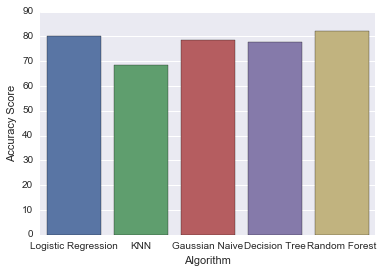

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.barplot (x='Algorithm', y='Accuracy Score', data=models)